# IMORTING LIBRARIES

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

import sklearn.preprocessing as preproc

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer 

from sklearn.decomposition import PCA

from sklearn import preprocessing

from sklearn.model_selection import train_test_split 

from sklearn.experimental import enable_iterative_imputer

from sklearn import impute

from sklearn.impute import IterativeImputer

from sklearn.impute import KNNImputer

from imblearn.over_sampling import SMOTE

from imblearn.under_sampling import NearMiss

from IPython.display import Image

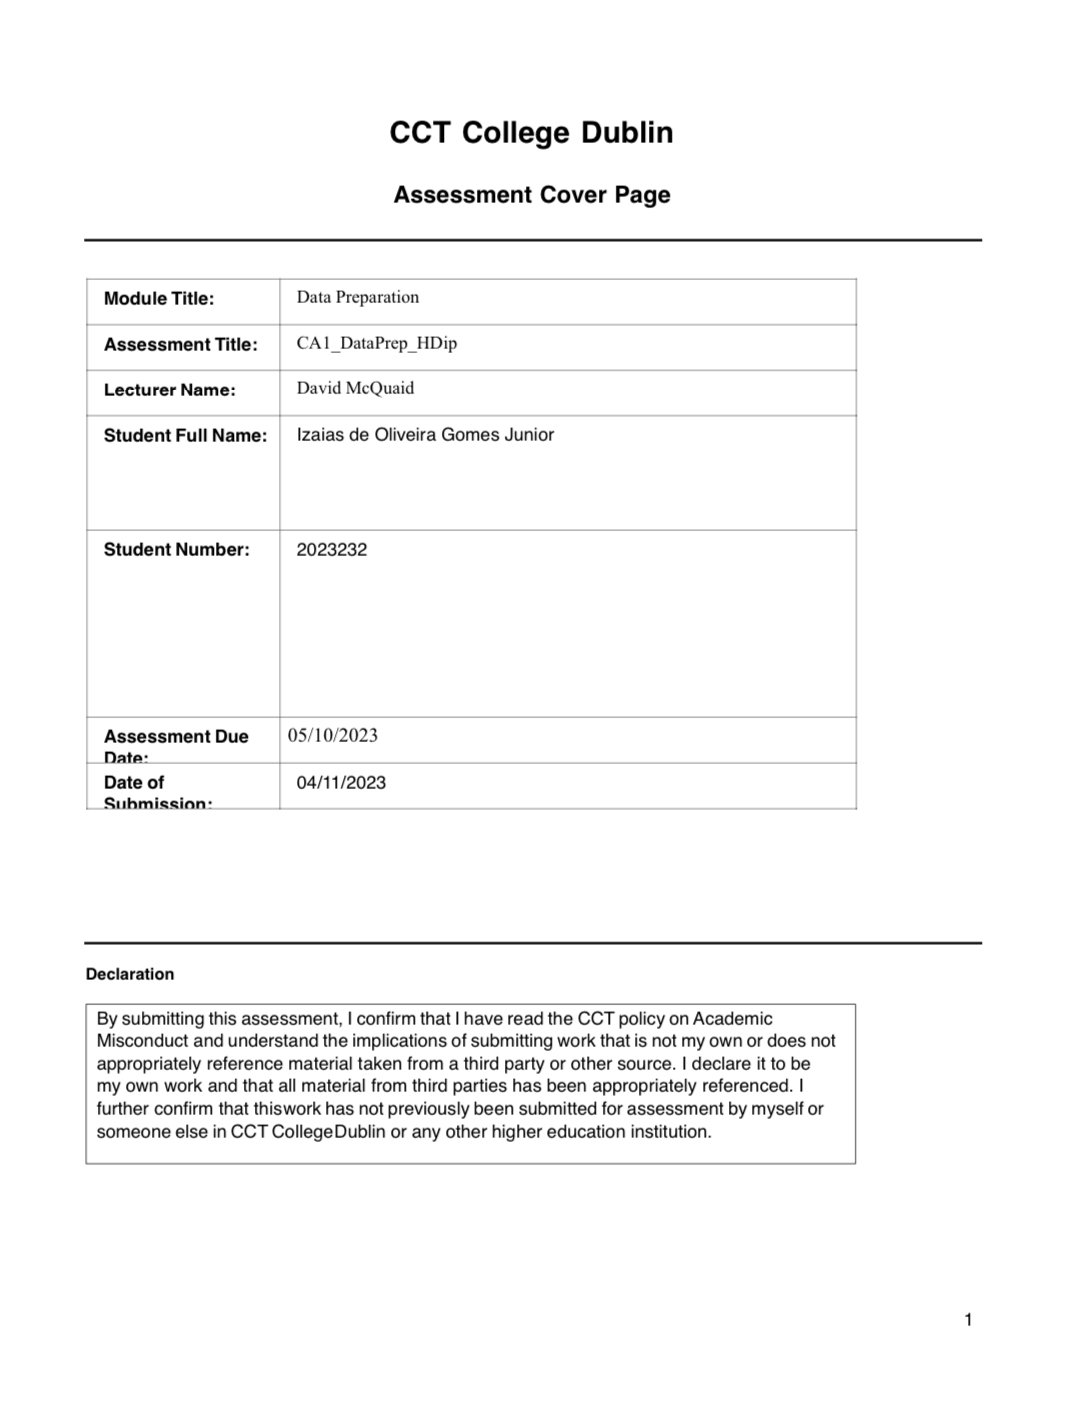

In [2]:
image_path = "cover_dp.jpeg"

Image(filename = image_path)

# CA1

Scenario: 

You have been retained by a haulage company to analyse a dataset based on data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. The dataset’s  positive class consists of component failures for a specific component of the APS system.

The negative class consists of trucks with failures for components not related to the APS. The data consists  of a subset of all available data, selected by experts. This analysis will help determine the investment strategy for the company in the upcoming year.

All data wrangling, analysis, and visualizations must generated using python.

The companies CTO also requires you to rationalize all the decisions that you have made in your report.

Minimum Requirements 

You are required to use the dataset contained within the file “aps_failure_set.csv”, conduct the following analysis and report on your findings:

Characterization of the data set: size; number of attributes; has/does not have missing values, number of observations etc.

Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.
Use PCA to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered. Include a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.
Explain in your own words what the “Curse of Dimensionality ” is and how it may affect your analysis going forward.
Conclusions, Findings of data set and references (HARVARD style).
Note that all written work MUST be completed in Jupyter Notebook Markdown (please review “Jupyter Notebook Tutorial” Notes in Moodle if you are unsure of this).

All Code must be included in code blocks (As normal). No other upload will be accepted.

All written work MUST be detailed in your Jupyter Markdown (NOT in code comments).



# Explain in your own words what the “Curse of Dimensionality ” is and how it may affect your analysis going forward.

The Curse of Dimensionality occurs when it is hard to get meaningful patterns within the data due its large number of features (dimensions). The analysis may be affected by different reasons, two of them are:
- the amount of time that the algorithms have to process high-dimensional data;
- the amount of noise surpassing the significant patterns, causing the phenomenal called overfitting and impacting on the generalisation of the model.

# EDA

Exploratory Data Analysis. 

After importing the necessary libraries the next step is to do the Exploratory Data Analysis in our raw data to check its characteristics, such as: the size, shape, which kind of features and observations they are, if there are any missing or duplicated values and what kind of distribution it is. EDA was originally developed in 1970 by the American mathematician John Tukey (IBM, 2023). 

This is a crucial task because it is the one that helps us to understand what we are dealing with and which approach we are going to use next to obtain a good accuracy for the Machine Learning Model applied and get effective results. 



In [3]:
ca1 = pd.read_csv("aps_failure_set.csv")

In [88]:
ca1.head(2)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class_neg
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,1
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,1


In [5]:
ca1.shape

(60000, 171)

The shape of our dataset tells us that we have 60,000 observations distributed into 171 features. Some questions can be made in this point: 
- Is there any missing or duplicated values within the observations?;
- Are all the independent variables important to explain the target variable?

We need to keep exploring our raw data to answer those and other questions. 

In [6]:
ca1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


The function .info() shows us that something is wrong with our observations. We know that all of our independent variables should be classified as numbers (int64 or float64) by the description of our dataset. Early when we looked at the head we saw a lot of numbers and some "na" observations. All the features are being considered as objects which means these "na" are strings, that is the reason why we are going to see that apparently we do not have any missing values in our dataset.

In [7]:
ca1.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

As written above, no missing values were found because all the independent variables are considered as objects. The following steps will include substituting all the "na" strings for the special value "NaN", counting the missing values and testing which is going to be the best way to deal with them.


In [8]:
ca1.describe(include = "object")

,class,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,30,2062,1887,334,419,155,618,2423,7880,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,na,0,na,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,46329,8752,14861,55543,55476,59133,58587,56181,46894,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794


From the 20 columns out of 171 that we can see in these descriptions in two we can see the occurrence of "na". In the "ab_000" column 77.21% of all observations are "na" and in the "ad_000" 24.76%. It could be problematic if this is a constant in the structure of our dataset because the amount of missing values is high and significant information might be lost if it is not properly dealt with. Another observation is the frequency of the value 0 across all the features which indicates that the dataset is sparse. 


<Axes: xlabel='class', ylabel='Count'>

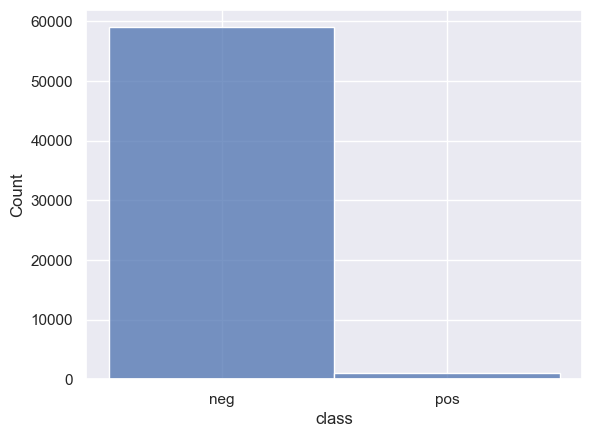

In [9]:
sns.histplot(data = ca1, x = "class")

By plotting this graphic of the target variable "class" we can see that the amount of failures for components not related to the APS system is significantly superior to the ones related to the APS. The difference between the two classes are so strong that it may be necessary to balance the dataset so the accuracy can be more trustworthy. A higher accuracy in this case might be misleading given the bias. The imbalance of the dataset can cause an overfitting in the Machine Learning Model when the minority class tends to be ignored over the majority (Truong, 2022). 

The application of SMOTE (Synthetic Minority Oversampling Technique), where the dataset is balanced by the creation of synthetic samples of the minority class (SATPATHY) can be a solution for this problem or undersampling techniques such as Near-miss that eliminate the majority class observations by random in order to balance the dataset (Imarticus, 2021).


In [10]:
ca1.duplicated().sum()

0

In [11]:
miss_vals = ["na"]

Defining that all missing values are "na"

In [12]:
ca1 = pd.read_csv("aps_failure_set.csv", na_values = miss_vals)

Substituting all missing values for the special value NaN so the columns can be counted as numbers (float or int64) and not objects as before.


In [13]:
ca1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


The only object column is the "class" where the target variable is held.


In [14]:
ca1.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


"Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories)." (Brownlee, 2020). That is the reason why the variable "class" will be transformed in a numerical data through the One-Hot Enconding where a binary value will be put in place and no ordinal relationship will be forced. This method create two new features where "class_neg" will be 1 when the "neg" value is true and 0 when is false and "class_pos" will be the oposite. The new variable "class_pos" will be dropped so we have just one target variable and the Machine Learning models can perform their mathematical procedures. 

In [15]:
ca1 = pd.get_dummies(ca1)

In [16]:
ca1.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class_neg,class_pos
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,1,0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,1,0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,1,0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,1,0
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,1,0


In [17]:
ca1.drop(columns = "class_pos", inplace = True)

In [18]:
ca1.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class_neg
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,1
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,1
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,1
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,1
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,1


In [90]:
mv = ca1.isnull().sum().sum()
print(mv)

850015


The dataset has 60000 rows and 171 columns summing up 10,260,000 data points. Out of this amount the number of missing values is 850,015 which represents approximately 8.28% of all data points. 


"The proportion of missing data is directly related to the quality of statistical inferences. Yet, there is no established cutoff from the literature regarding an acceptable percentage of missing data in a data set for valid statistical inferences. For example, Schafer ( 1999 ) asserted that a missing rate of 5% or less is inconsequential. Bennett ( 2001 ) maintained that statistical analysis is likely to be biased when more than 10% of data are missing. Furthermore, the amount of missing data is not the sole criterion by which a researcher assesses the missing data problem. Tabachnick and Fidell ( 2012 ) posited that the missing data mechanisms and the missing data patterns have greater impact on research results than does the proportion of missing data." (Dong and Peng, 2013)

There is no consensus about the acceptable percentage of missing value, that is one reason why it is so important to study the dataset - through EDA for example - and perform multiple experiments to get to a satisfactory result. That is the intention of this project as it will be shown in the following steps.

In [20]:
ca1.head(50)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class_neg
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,1
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,1
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,1
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,1
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,1
5,38312,NaN,2.130706e+09,218.0,0.0,0.0,0.0,0.0,0.0,0.0,...,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0,1
6,14,0.0,6.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,102960,NaN,2.130706e+09,116.0,0.0,0.0,0.0,0.0,0.0,0.0,...,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0,1
8,78696,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0,1
9,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,11804.0,...,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0,0


Now that the substitutions were made we can have a clearer picture of our dataset and start the experiments and decide which is going to be the best way to deal with it.

The maximum number of columns that it is shown is 50. The idea is to check all the columns to see if it is important to keep all of them when replacing the missing variables. As we saw above some features have more than 70% of observations missing. Is it important to keep those columns? If we replace this high amount of missing values with one of the measures of central tendency or another technique will we input bias to the dataset? In order to answer those questions that have arisen from this step of the EDA it is necessary to do some experiments and analyse which method is the best choice.


There are three classes of Missing Data (Kaiser, 2014):

- Missing Completely at Random: in this case the observed data or the missing data do not impact on the occurrence of a record having missing values. For example when the data is lost in a laboratory due an accident while conducting the research;

- Missing at Random: while in the previous class the observed data does not have an impact, in this case it does, the difference is that the probability of having a missing value is not impacted by the missing value itself. It might happen when the researcher does not get the information required, for example in a questionnaire where salary is one of the questions the missing values could be from the ones that earn more, who tend to be more reluctant to answer this type of questions;

- Not Missing at Random: According to (Stef van Buuren, 2018), this is the most complex case when the reasons why the values are missing are not known. One of the reasons could be the instruments in a laboratory are not working effectively and the researcher does not notice it.

Unfortunately for this project will not be possible to verify the reason why those data are missing.

# Counting the number of Columns with high number of missing values

In [21]:
isnull = ca1.isnull().sum()

nperc = (isnull / (len(ca1))) * 100

more_than_50 = nperc[nperc > 50]

print(more_than_50)

ab_000    77.215000
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64


In [22]:
isnull = ca1.isnull().sum()

nperc = (isnull / (len(ca1))) * 100

more_than_40 = nperc[nperc > 40]

print(more_than_40)

ab_000    77.215000
bl_000    45.461667
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64


In [23]:
isnull = ca1.isnull().sum()

nperc = (isnull / (len(ca1))) * 100

more_than_30 = nperc[nperc > 30]

print(more_than_30)

ab_000    77.215000
bk_000    38.390000
bl_000    45.461667
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64


In [94]:
isnull = ca1.isnull().sum()

nperc = (isnull / (len(ca1))) * 100

less_than_30 = nperc[nperc < 30]

#print(less_than_30)

lt30 = nperc[nperc < 30].count()
lt30

161

8 columns with more than 50% of the values null (4,67%)

9 columns with more than 40% of the values null (5,26%)

10 columns with more than 30% of the values null (5,84%)

An experiment was performed dropping the 8 columns with more than 50% of missing values. The results will be presented at the end of the report but it is possible to check the full experiment on the link below:

http://localhost:8888/notebooks/Documents/GitHub/data_prep_ca1/Dropping_Columns.ipynb

Also avaible on my GitHub repository: 
https://github.com/izazaka/DataPrep.git

# DROPPING MISSING VALUES 

In [100]:
ca1_d = ca1.dropna(axis = 0)

Dropping all the missing values on the rows.

In [101]:
ca1_d.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class_neg
16,31300,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,20386.0,...,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0,1
179,97000,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,84938.0,...,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0,1
225,124656,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,194792.0,...,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0,1
394,281324,2.0,3762.0,2346.0,0.0,0.0,4808.0,215720.0,967572.0,2037438.0,...,269976.0,638838.0,1358354.0,819918.0,262804.0,2824.0,0.0,0.0,0.0,0
413,43482,0.0,1534.0,1388.0,0.0,0.0,0.0,0.0,40024.0,493856.0,...,121166.0,202272.0,232636.0,645690.0,50.0,0.0,0.0,0.0,0.0,0


In [102]:
class_ca1_d = test1[["class_neg"]]

class_ca1_d.head(2)

,class_neg
16,1
179,1


In [103]:
class_ca1_d.shape

(591, 1)

Target variable from the dataset without the missing values.

The missing values represent 8.28% of all values and are presented in 99.015% of the rows. An experiment was made deleting those rows and working with the remaining 591 rows (0.985%). As the other test, the results will be presented at the end of the report but it is possible to check the full experiment on the link below:

http://localhost:8888/notebooks/Documents/GitHub/data_prep_ca1/Dropping_Missing_Values.ipynb

Also avaible on my GitHub repository: https://github.com/izazaka/DataPrep.git

# SPLITTING THE DATASET 

Splitting the dataset in y (target variable) and X (independent variables) to simplify the next steps.

In [34]:
class_ca1 = ca1[["class_neg"]]

class_ca1.head(2)

,class_neg
0,1
1,1


In [35]:
ca1_split = ca1.drop(["class_neg"], axis = 1)

ca1_split.head(2)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0


In [36]:
X = ca1_split

y = class_ca1

In [37]:
y.value_counts()

class_neg
1            59000
0             1000
dtype: int64

# Dealing with Missing Values

The imputation using the median was the first option considered due to its simplicity and for being less sensitive to outliers than the other summary statistics (Kumar, 2021). However, the dataset has a complexity that requires a more sophisticated approach. The KNN Imputer was chosen for the following reasons (Firdose):
- capturing relationships between variables;
- preserving the structure and patterns present in the data;
- and for its non-parametric approach which does not make assumptions about the data distribution.

The trade-off will be the computational complexity and the sensitive to outliers. The second one will be dealt with the l2 Normalisation (Htoon, 2020).

In [38]:
imputer = KNNImputer(n_neighbors = 5)


In [39]:
X = imputer.fit_transform(X)


Due the computational complexity and the factor time, the number of neighbours (k) will be the Sklearn default (k = 5) (scikit-learn.org, n.d.). The ideal is to apply a cross-validation method to choose the parameter accordingly (Brownlee, 2020).

# Normalisation

In [42]:
value_to_count = 0

mask = ca1.applymap(lambda x: x == value_to_count)

frequency = mask.sum()

is0 = (frequency / (len(ca1))) * 100

more_50 = is0[is0 > 50]

mt50 = pd.DataFrame(more_50)

more_50.describe()


count    53.000000
mean     83.819308
std      14.255357
min      50.563333
25%      75.156667
50%      91.546667
75%      94.973333
max      98.916667
dtype: float64

In [104]:
is0.head()

aa_000     0.655000
ab_000    18.295000
ac_000    14.586667
ad_000     3.348333
ae_000    92.571667
dtype: float64

In [44]:
tr = Normalizer()

X_scaled = tr.fit_transform(X)

The standardisation is an important step so all the variables can contribute equally to the analysis, otherwise the results might be biassed once the variables with larger ranges will dominate over the smaller ones. 

The method chosen was the l2 Normalization (Euclidian norm) due the amount of zero values which makes this dataset a sparse one. Among the 171 columns, 54 have more than 50% of values as zero. 

# PCA

In [121]:
pca = PCA()

pca.fit(X_scaled)

PCA()

In [122]:
variance = pca.explained_variance_ratio_

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3)*100)

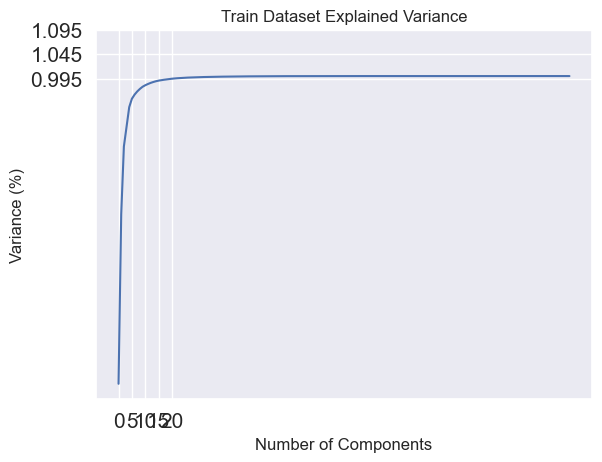

In [134]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.xticks(np.arange(0, 24, 5), fontsize = 15)
plt.ylabel("Variance (%)")
plt.yticks(np.arange(0.995, 1.1, 0.05), fontsize = 15)
#plt.xticks(np.arange(0, 24, 5), fontsize = 15, rotation = 0, ha = 'center')
plt.title("Train Dataset Explained Variance")
plt.show()

The graph shows that to get 99.5% variance the minimum amount of components is 15.

# APPLYING PCA

In [50]:
pca = PCA(n_components = 15)

ca1_pca = pca.fit_transform(X_scaled)

In [51]:
ca1_pca = pd.DataFrame(ca1_pca)

ca1_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.673808,-0.685512,-0.046597,0.005333,-0.005526,-0.016629,0.001112,-0.003436,0.002688,0.002653,0.001299,-0.000547,0.002405,0.002059,-0.000398
1,-0.573880,-0.104028,-0.163572,-0.084762,0.150810,-0.063430,-0.050200,-0.078828,-0.017844,-0.021320,0.031140,0.074079,-0.013336,0.031838,0.011299
2,-0.557382,-0.120313,-0.332898,0.021709,-0.168002,-0.054240,0.037875,0.045518,0.002094,0.034994,-0.012872,-0.074888,-0.049162,-0.097641,-0.075348
3,0.443338,0.706723,-0.013209,-0.048886,0.003435,0.005316,-0.032671,0.025458,-0.011652,0.014792,-0.000733,0.005886,0.006674,-0.008359,-0.006900
4,-0.498155,-0.152890,0.486271,-0.065412,-0.141654,-0.012899,0.030994,-0.081362,0.026244,0.078769,-0.056114,0.029262,0.012308,0.021079,0.007572


ca1_concat = pd.concat([ca1_pca, y[["class_neg"]]], axis = 1)

ca1_concat.head()

In [52]:
ca1_concat = pd.concat([ca1_pca, class_ca1[["class_neg"]]], axis = 1)

ca1_concat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,class_neg
0,0.673808,-0.685512,-0.046597,0.005333,-0.005526,-0.016629,0.001112,-0.003436,0.002688,0.002653,0.001299,-0.000547,0.002405,0.002059,-0.000398,1
1,-0.573880,-0.104028,-0.163572,-0.084762,0.150810,-0.063430,-0.050200,-0.078828,-0.017844,-0.021320,0.031140,0.074079,-0.013336,0.031838,0.011299,1
2,-0.557382,-0.120313,-0.332898,0.021709,-0.168002,-0.054240,0.037875,0.045518,0.002094,0.034994,-0.012872,-0.074888,-0.049162,-0.097641,-0.075348,1
3,0.443338,0.706723,-0.013209,-0.048886,0.003435,0.005316,-0.032671,0.025458,-0.011652,0.014792,-0.000733,0.005886,0.006674,-0.008359,-0.006900,1
4,-0.498155,-0.152890,0.486271,-0.065412,-0.141654,-0.012899,0.030994,-0.081362,0.026244,0.078769,-0.056114,0.029262,0.012308,0.021079,0.007572,1


# SPLITTING AND TRAINING OUR MODEL

In [53]:
ca1_array = ca1_concat.values

In [54]:
X = ca1_array[:,0:15]

y = ca1_array[:,15]

In [55]:
y

array([1., 1., 1., ..., 1., 1., 1.])

In [56]:
X

array([[ 6.73807718e-01, -6.85511553e-01, -4.65967299e-02, ...,
         2.40500721e-03,  2.05931416e-03, -3.98099548e-04],
       [-5.73880390e-01, -1.04028395e-01, -1.63572025e-01, ...,
        -1.33363386e-02,  3.18383553e-02,  1.12992323e-02],
       [-5.57381558e-01, -1.20313032e-01, -3.32898014e-01, ...,
        -4.91620180e-02, -9.76410945e-02, -7.53481440e-02],
       ...,
       [ 6.82172276e-01, -6.84560939e-01, -4.25145622e-02, ...,
         2.29451379e-03,  1.74438308e-03,  9.70783397e-04],
       [ 6.68062962e-01, -6.86688056e-01, -3.12695910e-02, ...,
         2.77551712e-03,  1.67250891e-03, -1.09712246e-03],
       [-3.43748903e-01, -1.49476539e-01,  7.54015802e-01, ...,
        -7.01867263e-03,  2.33872855e-02,  8.59482047e-03]])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

# MODELS

The three Machine Learning Models chosen for this project is a small collection of models that best perform with larger datasets (Hastie, Tibshirani and Friedman, 2008). 

In [58]:
from sklearn import metrics

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

# SVM 

In [59]:
from sklearn import svm

In [60]:
cls_svm = svm.SVC(kernel = "linear") 

cls_svm.fit(X_train, y_train)

y_pred_svm = cls_svm.predict(X_test)

# KNN MODEL

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
kNN = KNeighborsClassifier(n_neighbors = 9)

kNN.fit(X_train, y_train)

y_pred_knn = kNN.predict(X_test)

# Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 50)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

In [140]:
y_pred_rf = rf_classifier.predict(X_test)

In [141]:
print("Accuracy SVM:", metrics.accuracy_score(y_test, y_pred_svm))

print("Accuracy KNN:", metrics.accuracy_score(y_test, y_pred_knn))

print("Accuracy RF:", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy SVM: 0.921
Accuracy KNN: 0.951
Accuracy RF: 0.9800666666666666


In [147]:
print("Classification Report SVM:", classification_report(y_test, y_pred_svm))

print("Classification Report KNN:", classification_report(y_test, y_pred_knn))

print("Classification Report RF:", classification_report(y_test, y_pred_rf))

Classification Report SVM:               precision    recall  f1-score   support

         0.0       0.16      0.91      0.28       250
         1.0       1.00      0.92      0.96     14750

    accuracy                           0.92     15000
   macro avg       0.58      0.91      0.62     15000
weighted avg       0.98      0.92      0.95     15000

Classification Report KNN:               precision    recall  f1-score   support

         0.0       0.23      0.83      0.36       250
         1.0       1.00      0.95      0.97     14750

    accuracy                           0.95     15000
   macro avg       0.61      0.89      0.67     15000
weighted avg       0.98      0.95      0.96     15000

Classification Report RF:               precision    recall  f1-score   support

         0.0       0.44      0.74      0.55       250
         1.0       1.00      0.98      0.99     14750

    accuracy                           0.98     15000
   macro avg       0.72      0.86      0.77     

# Dropping the columns with more than 50% of missing values

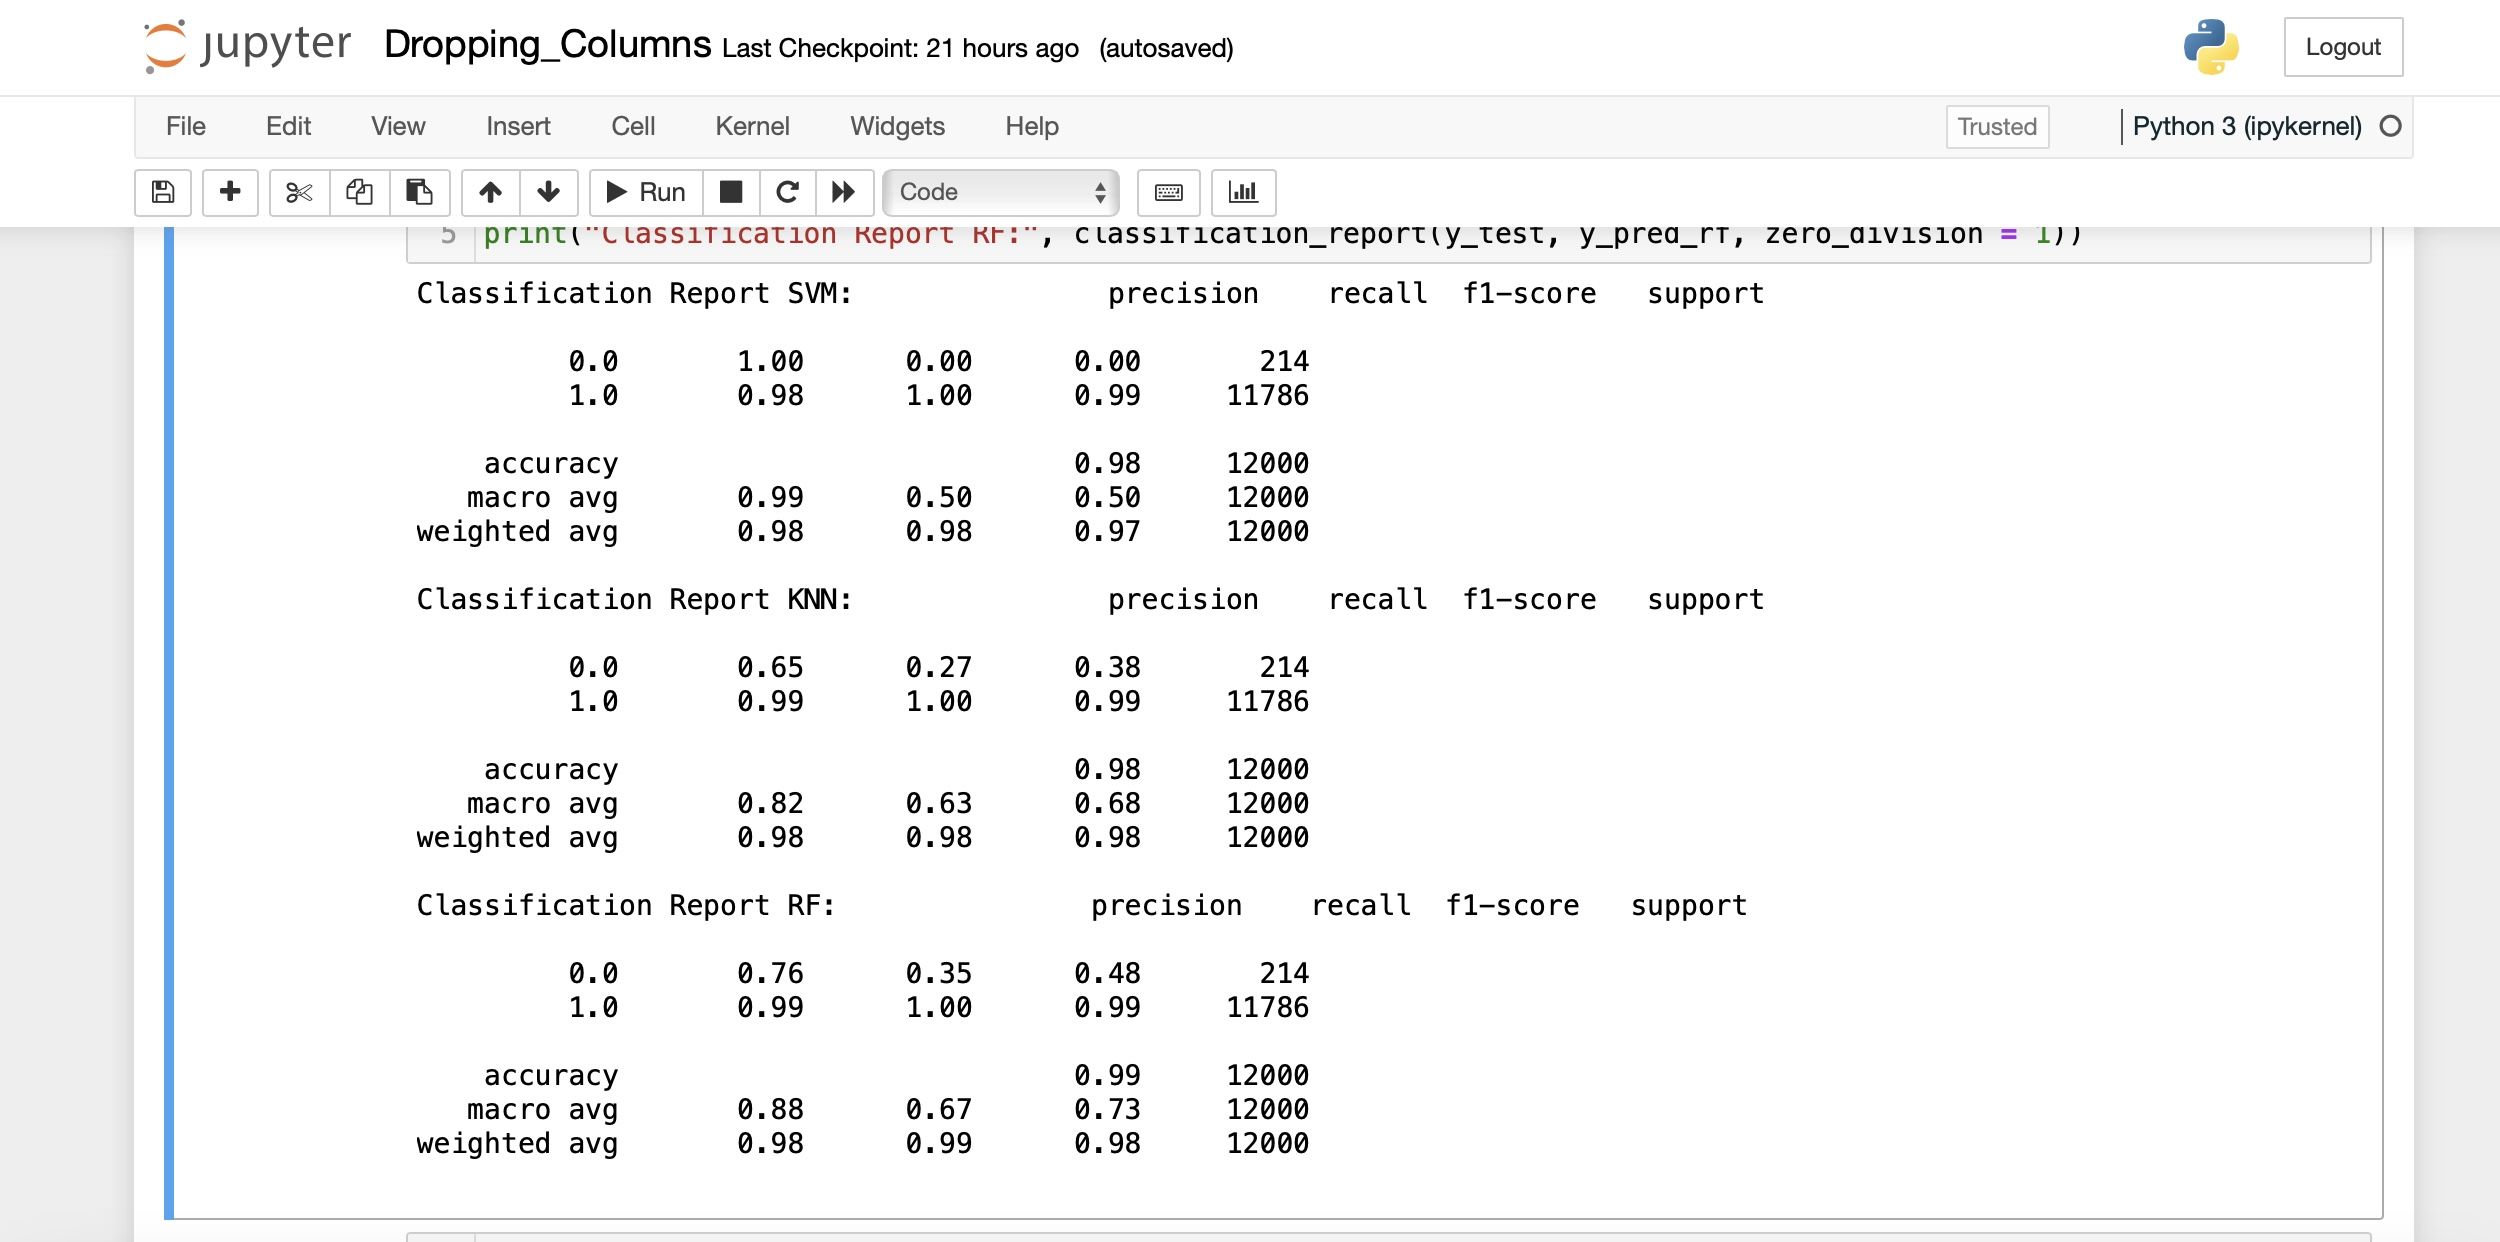

In [150]:
image_path = "cr_columns.jpg"

Image(filename = image_path)

# Dropping all the rows with missing values

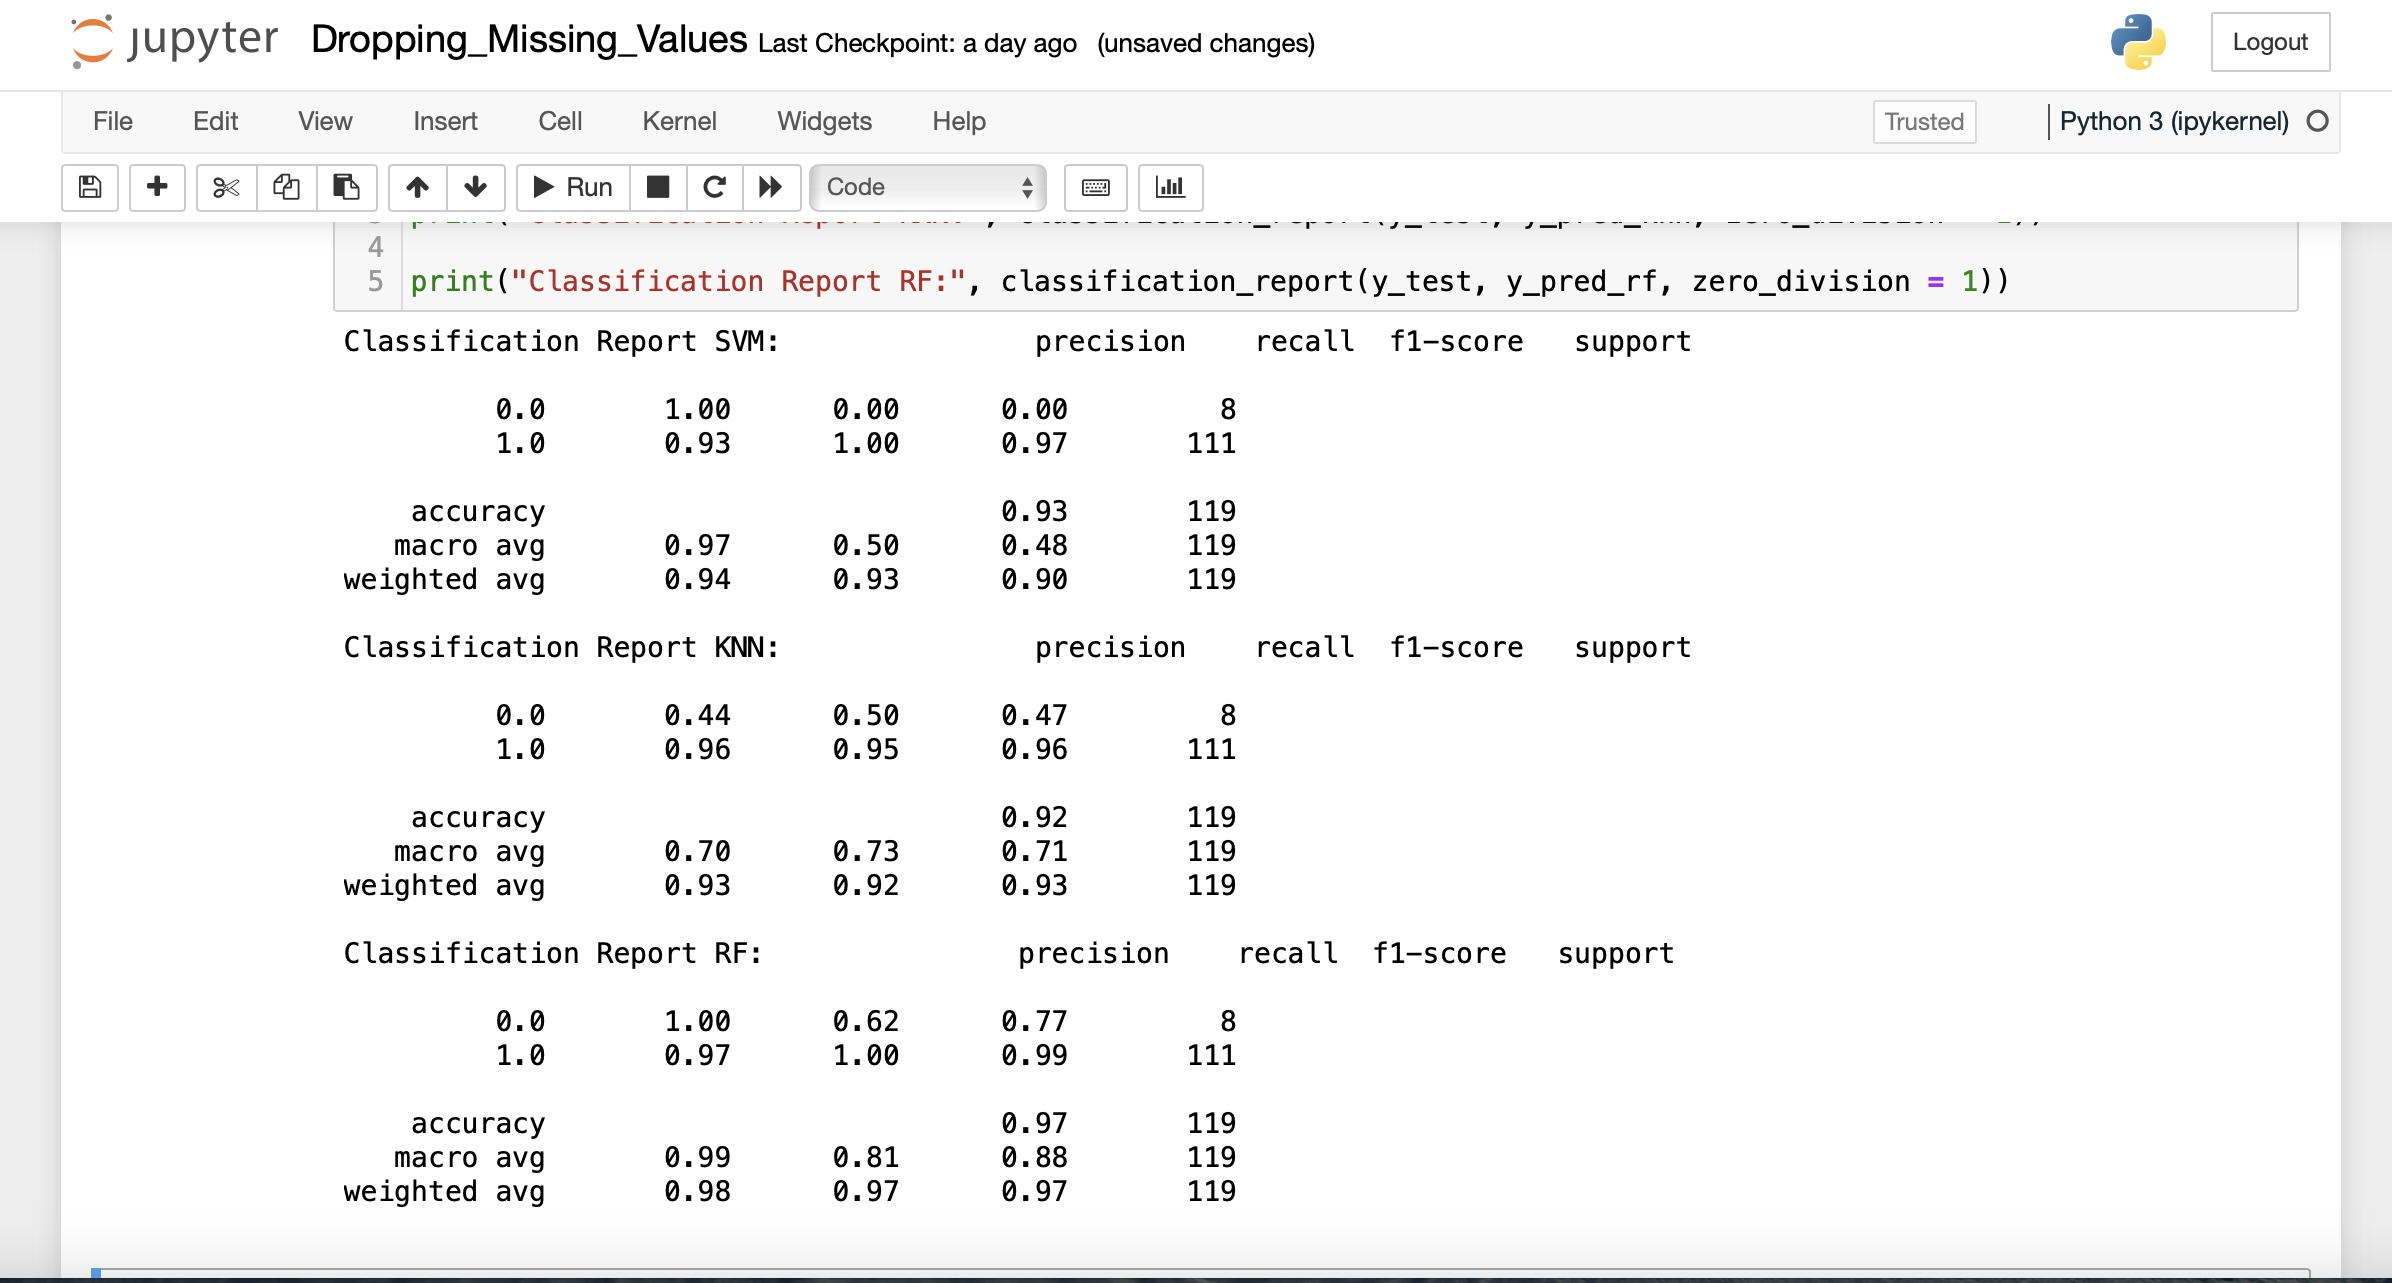

In [151]:
image_path = "cr_rows.jpg"

Image(filename = image_path)

# Under Sampling



The full experiment on the link below:

http://localhost:8888/notebooks/Documents/GitHub/data_prep_ca1/Under_Sampling.ipynb

Also avaible on my GitHub repository: https://github.com/izazaka/DataPrep.git

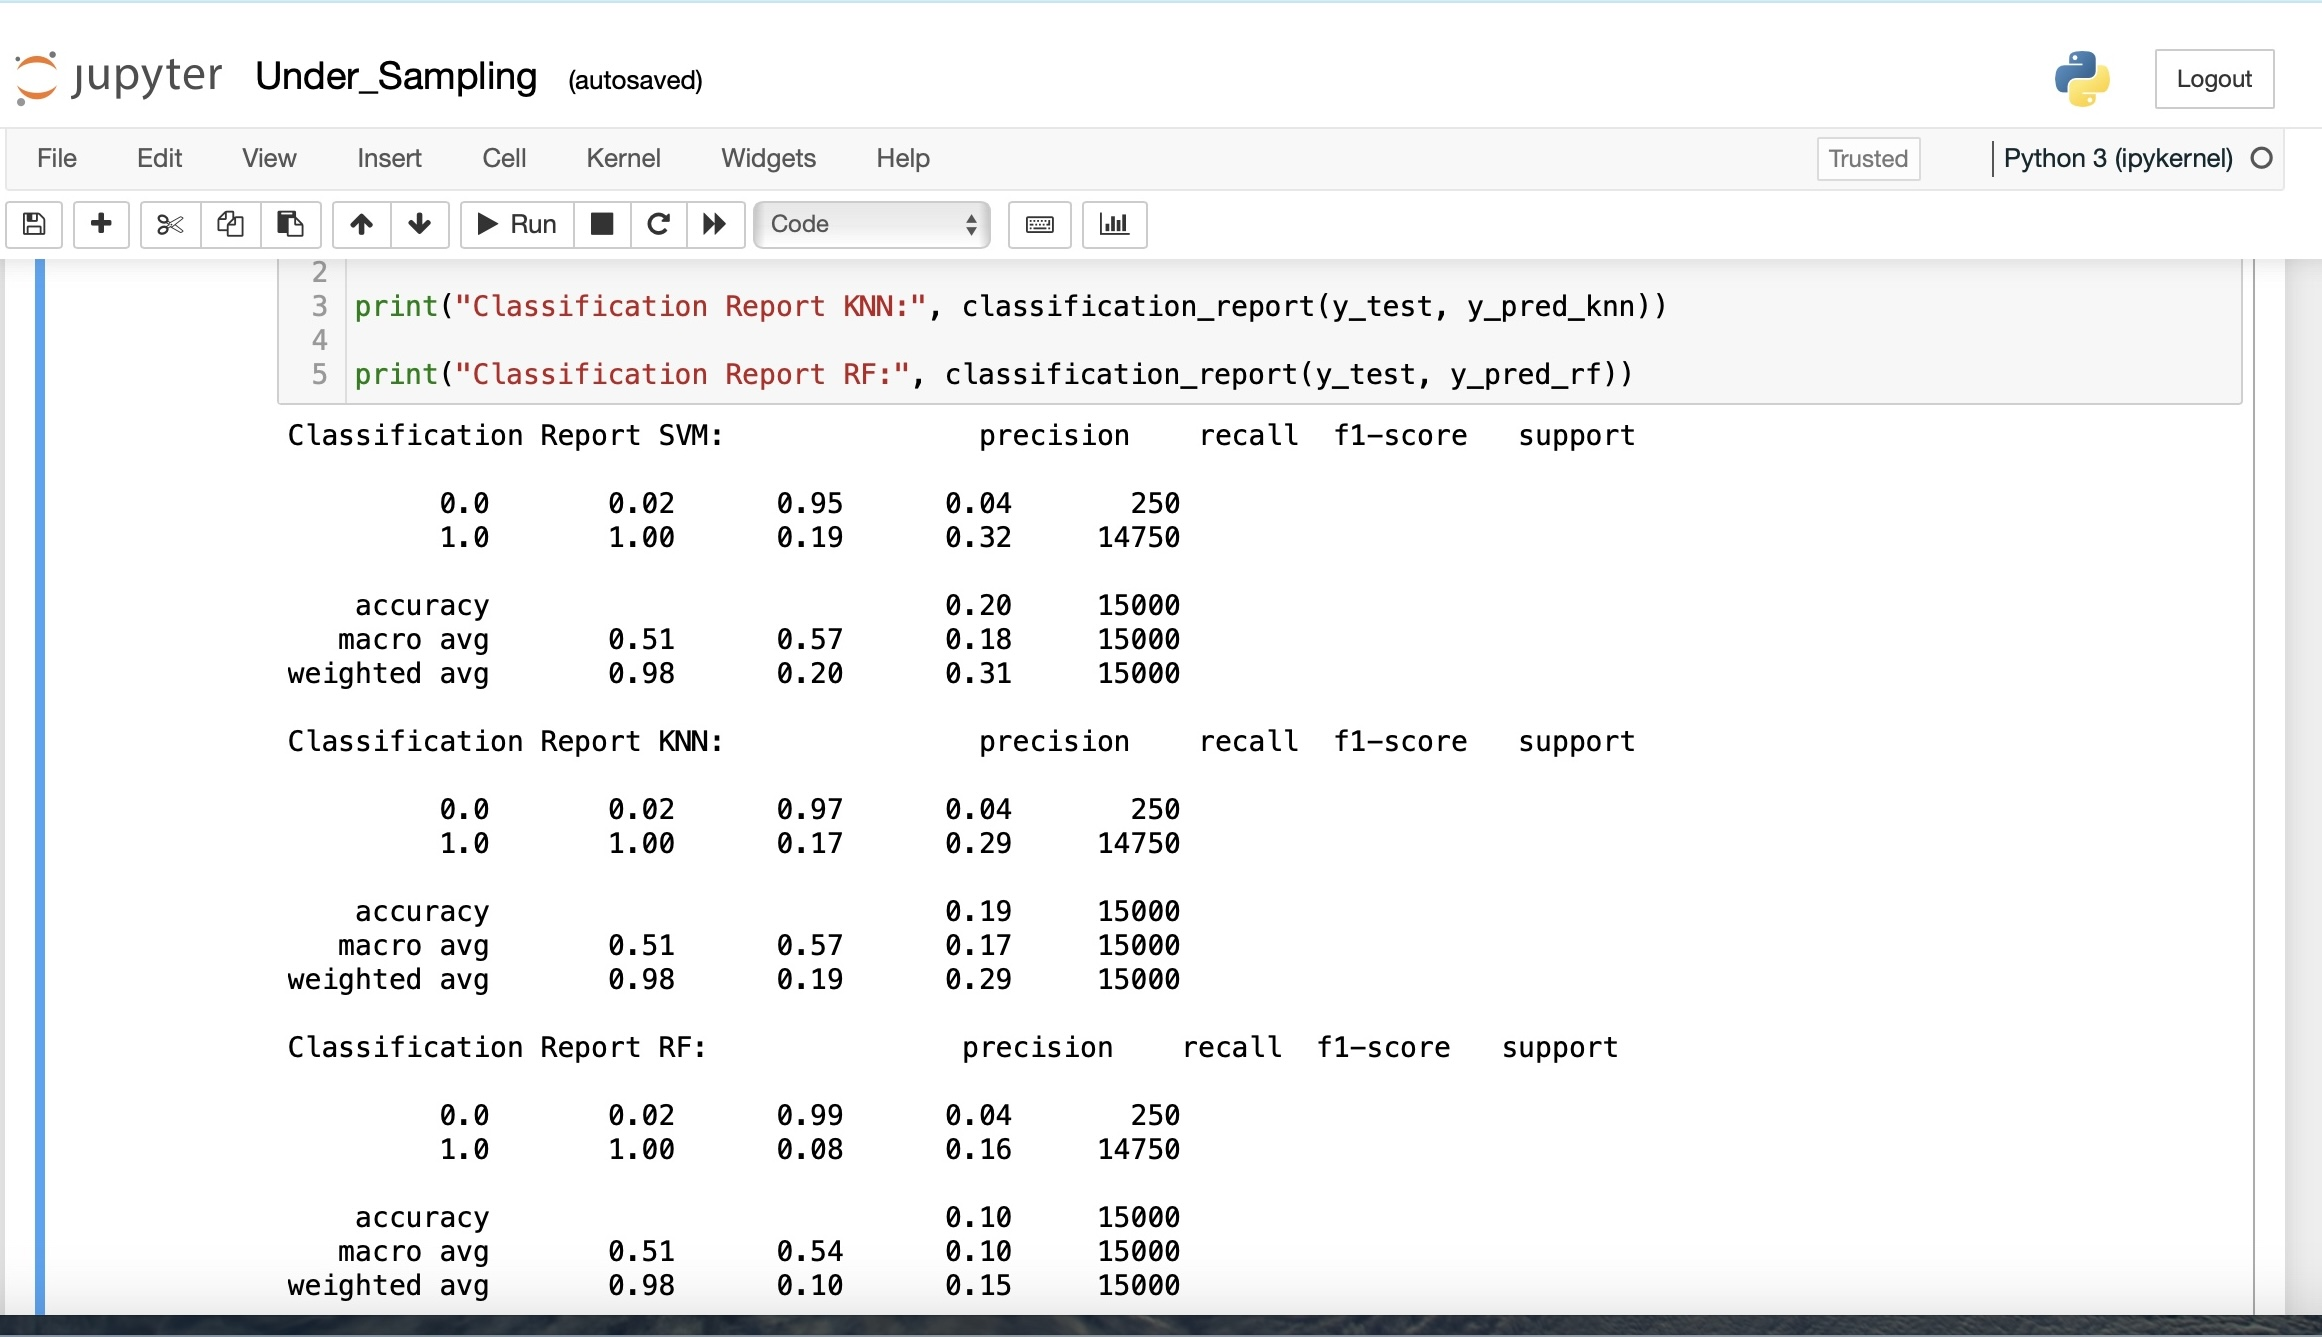

In [152]:
image_path = "cr_under.jpg"

Image(filename = image_path)

# Over Sampling

The full experiment on the link below:

http://localhost:8888/notebooks/Documents/GitHub/data_prep_ca1/Over_Sampling.ipynb

Also avaible on my GitHub repository: https://github.com/izazaka/DataPrep.git

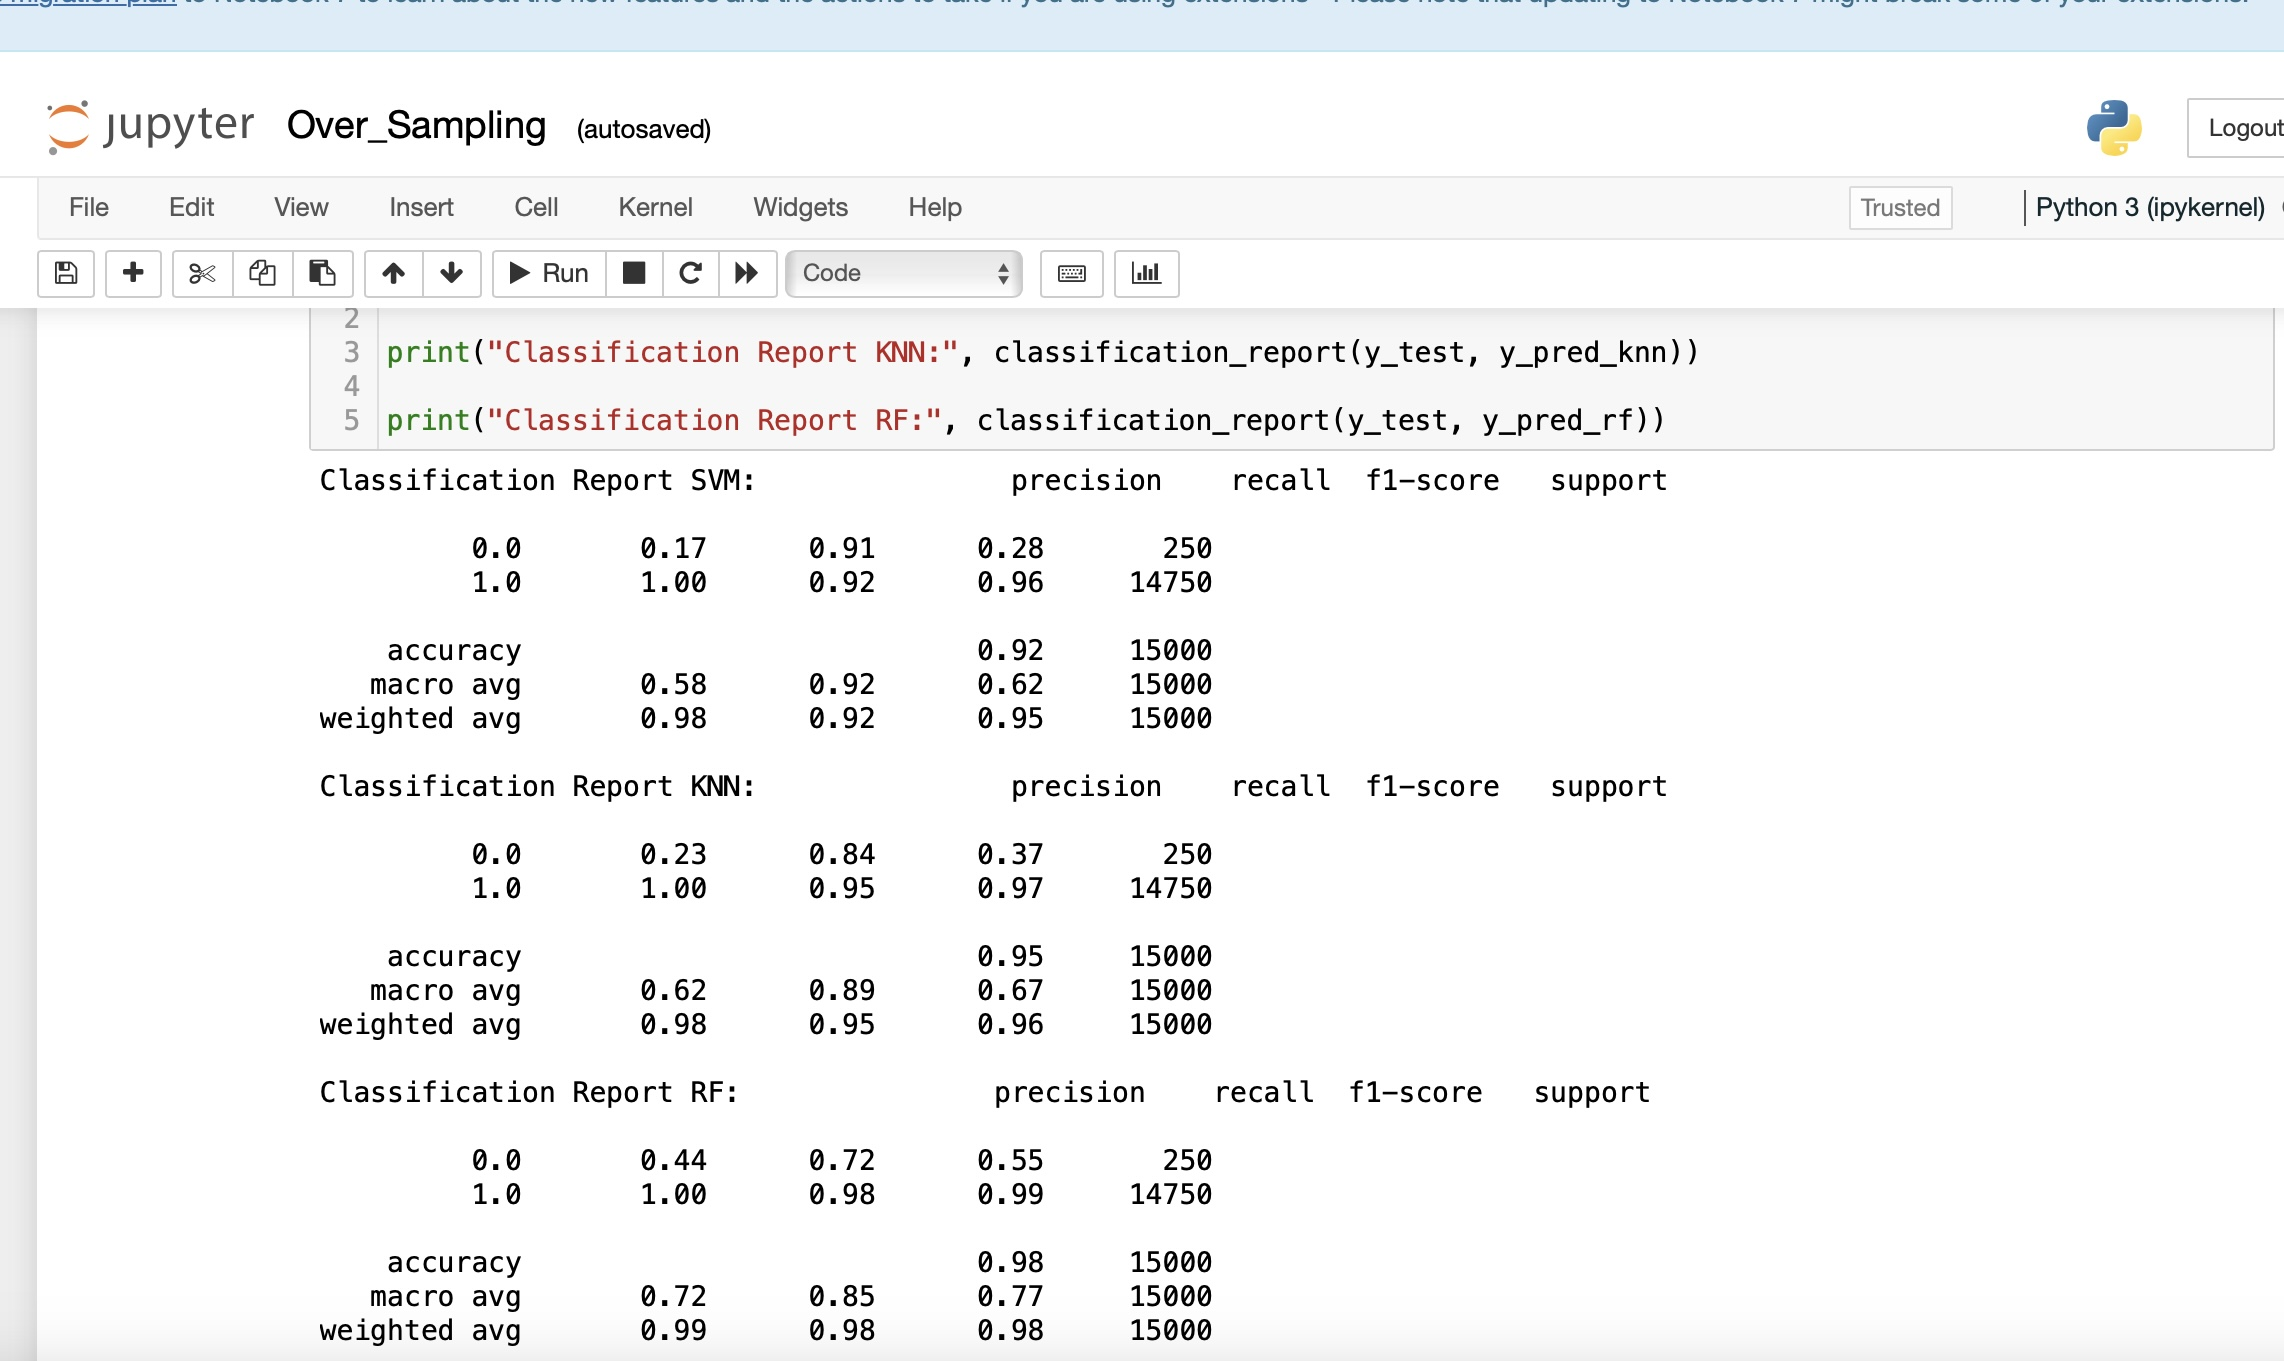

In [154]:
image_path = "cr_over.jpg"

Image(filename = image_path)

# Conclusions 

This was a challenging project where questions were appearing in every step of the EDA process. The knowledge that has been gathered in all four disciplines in the course and in the additional studies were put to the test to answer the questions and solve the problems. And some questions remain with no answer leading the path for future investigations. 

What to do with the missing values and the significant difference between the classes in the target variable were the two most difficult tasks. The 04 experiments made in addition to the main project were performed with the objective of better understanding the dataset and to support the final analysis. It would be important to know why the values are missing and in which classification they are set: Missing Completely at Random, Missing at Random or Not Missing at Random, and with this information at hand the methods applied could be chosen more accurately as on the imputation process. 

Analysing the results of the Machine Learning algorithms from all the experiments, it was found that Random Forest performed better in 04 of the 05 scenarios with the best accuracy, precision and recall. For all outcomes, the models could predict the dominant class ("neg") with almost no difficulties and obtain higher scores, in contrast the class ("pos"), which represents just 1.66% of the variable, had its precision and recall percentages in a lower level. The method to transform this variable from categorical to numerical, its unbalance and the parameters of the models are experiments that have to be done in a further project to improve the analysis. 

These past 24 days helped me to understand the work of a Data Analyst and made me realise that this is the career that I want to pursue. It also contributed to mark my weaknesses and limitations on which I will work on to enhance my abilities, specially in the coding and modelling area. 


# Reference List 

- Brownlee, J. (2020a). kNN Imputation for Missing Values in Machine Learning. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/

- Brownlee, J. (2020b). Ordinal and One-Hot Encodings for Categorical Data. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/.

- Dong, Y. and Peng, C.-Y.J. (2013). Principled missing data methods for researchers. SpringerPlus, [online] 2(1). doi:https://doi.org/10.1186/2193-1801-2-222.

- Hastie, T., Tibshirani, R. and Friedman, J. (2008). Springer Series in Statistics The Elements of Statistical Learning Data Mining, Inference, and Prediction Second Edition. [online] Available at: https://hastie.su.domains/Papers/ESLII.pdf.

- Htoon, K.S. (2020). A Guide To KNN Imputation. [online] Medium. Available at: https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e.

- IBM (2023). What is Exploratory Data Analysis? | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/topics/exploratory-data-analysis#:~:text=Exploratory%20data%20analysis%20(EDA)%20is.

- Imarticus (2021). Using Near-Miss Algorithm For Imbalanced Datasets! [online] Finance, Tech & Analytics Career Resources | Imarticus Blog. Available at: https://blog.imarticus.org/using-near-miss-algorithm-for-imbalanced-datasets/.

- Kaiser, J. (2014). Dealing with Missing Values in Data. Journal of Systems Integration, 2014/1(5(1):42-51), pp.42–51. doi:https://doi.org/10.20470/jsi.v5i1.178.

- Kumar, A. (2021). Python - Replace Missing Values with Mean, Median & Mode. [online] Data Analytics. Available at: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#:~:text=Impute%20%2F%20Replace%20Missing%20Values%20with%20Median.

- scikit-learn.org. (n.d.). sklearn.impute.KNNImputer — scikit-learn 0.23.1 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html.

- Stef van Buuren (2018). Flexible Imputation of Missing Data, Second Edition. CRC Press.

- Truong, A. (2022). Imbalanced Data ML: SMOTE and its variants. [online] TotalEnergies Digital Factory. Available at: https://medium.com/totalenergies-digital-factory/imbalanced-data-ml-smote-and-its-variants-c69a4b32f7e7.
